In [1]:
pip install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 76.3 kB/s eta 0:00:000:00:01m eta 0:00:01m
  Attempting uninstall: pip
    Found existing installation: pip 24.1.1
    Uninstalling pip-24.1.1:
      Successfully uninstalled pip-24.1.1
Note: you may need to restart the kernel to use updated packages.


In [7]:
from PIL import Image
import matplotlib.pyplot as plt

In [8]:
image_path = "archive/yes/Y1.jpg"
image = Image.open(image_path)

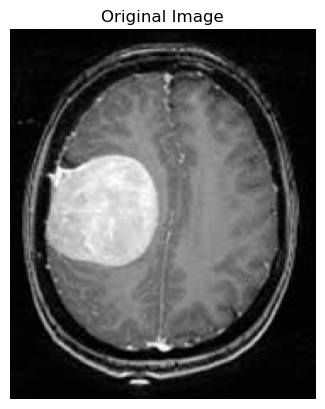

In [10]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

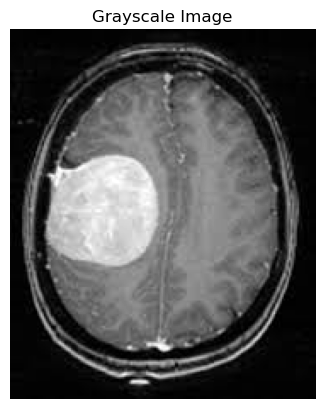

In [11]:
import numpy as np

image_gray = image.convert('L')
image_array = np.array(image_gray)

plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

In [14]:
image_array

array([[3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 3, 3],
       [2, 2, 2, ..., 1, 1, 2],
       [2, 2, 2, ..., 1, 1, 2]], dtype=uint8)

In [12]:
# Reshape the image array to (num_pixels, num_features)
pixels = image_array.reshape(-1, 1)  # Flatten to a 2D array where each row is a pixel intensity


In [13]:
pixels

array([[3],
       [3],
       [3],
       ...,
       [1],
       [1],
       [2]], dtype=uint8)

In [40]:
from sklearn.cluster import KMeans

# Number of clusters
num_clusters = 3

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=50)
kmeans.fit(pixels)
segmented_pixels = kmeans.labels_

# Reshape the clustered labels back to the original image shape
segmented_image = segmented_pixels.reshape(image_array.shape)


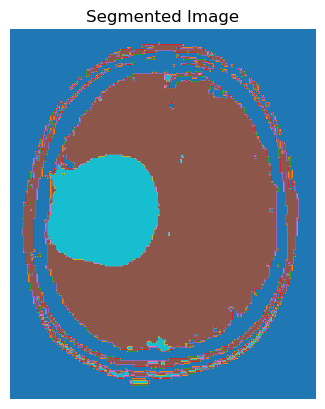

In [41]:
plt.imshow(segmented_image, cmap='tab10')
plt.axis('off')
plt.title('Segmented Image')
plt.show()

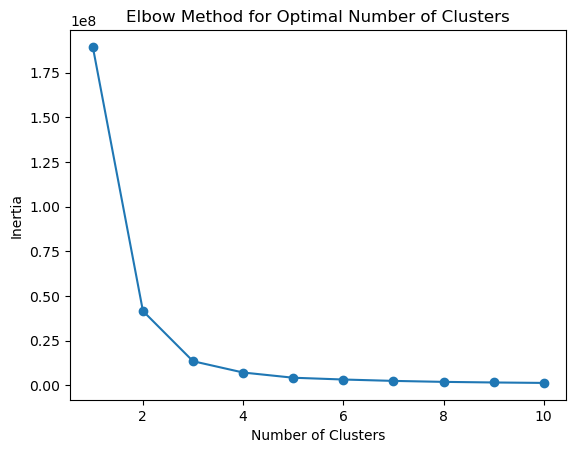

In [42]:
#using the elbow method to determine optimum number of clusters

inertia_values = []

# Testing different numbers of clusters
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=50)
    kmeans.fit(pixels)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

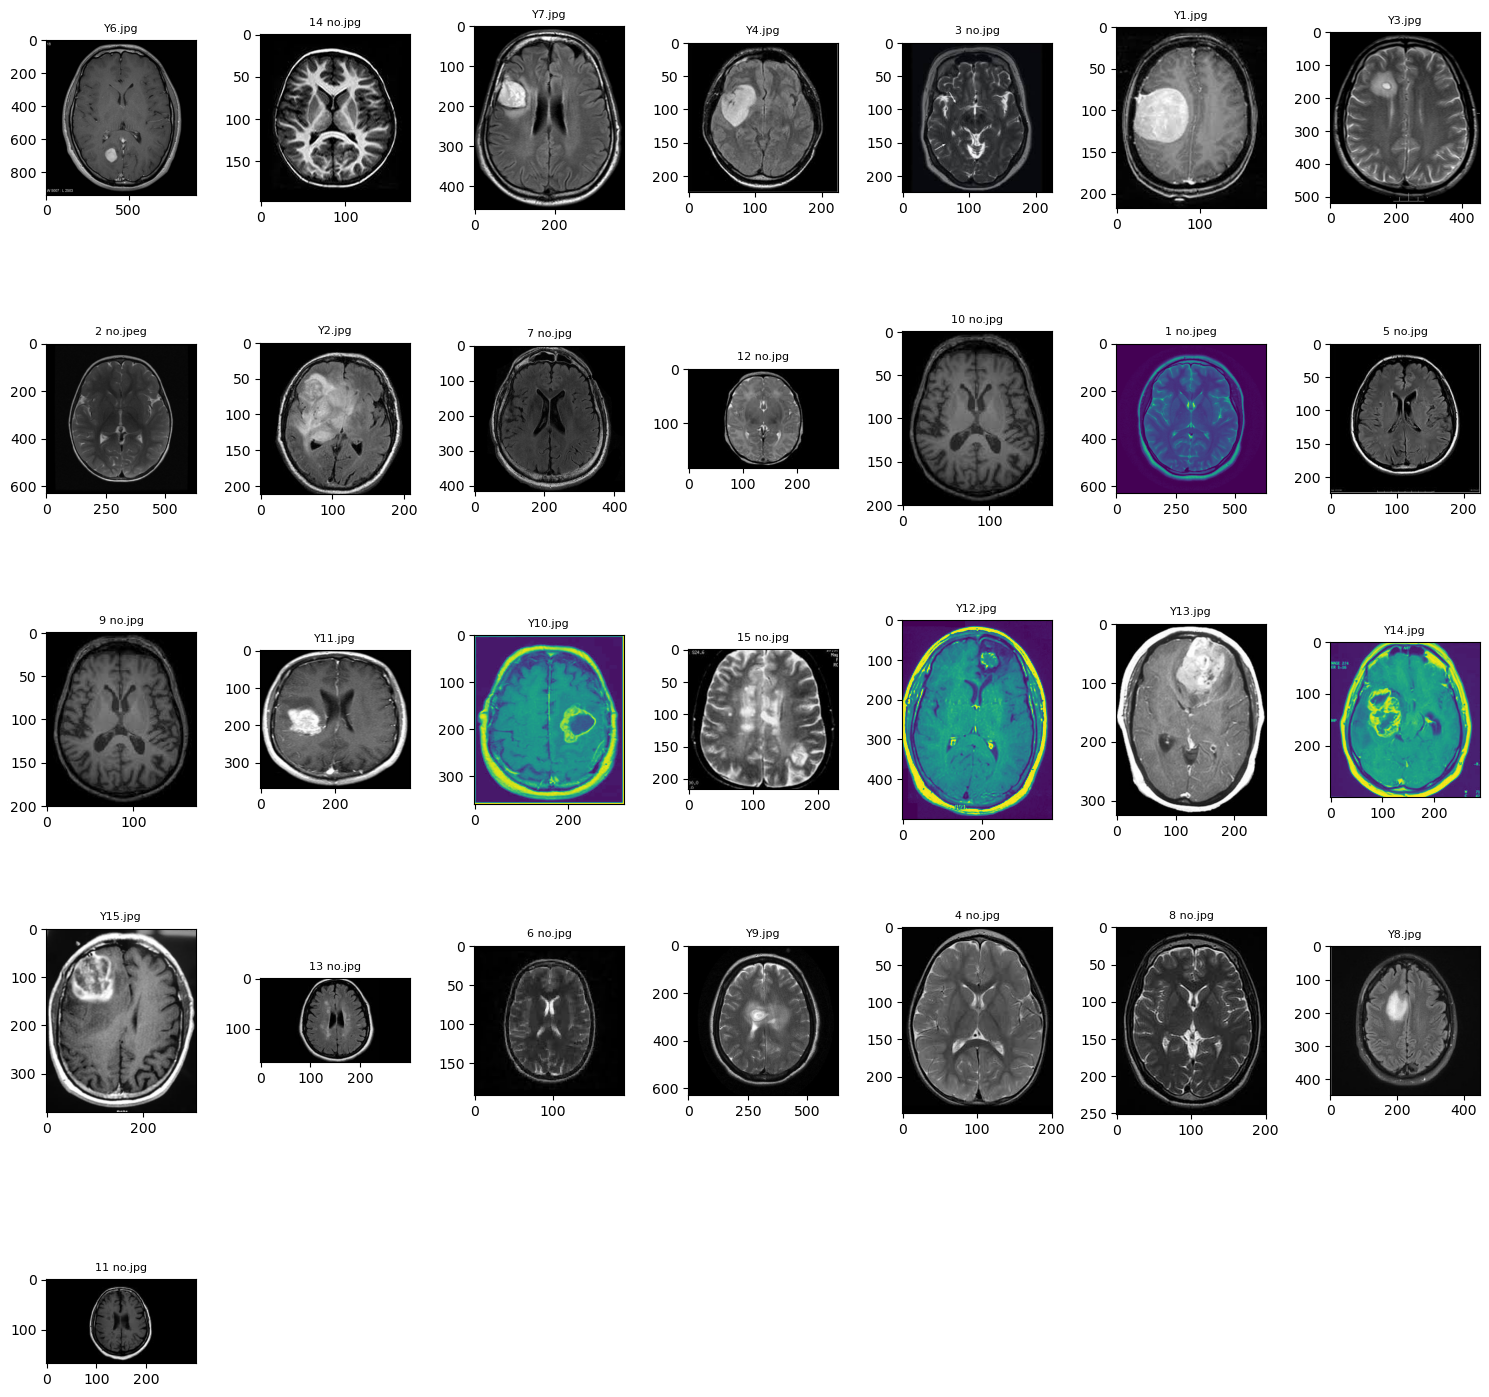

In [55]:
import os
def display_images(folder_path):
    # List all files in the directory
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Determine the number of images and the grid size
    num_images = len(image_files)
    cols = 7  # Number of columns in the grid
    rows = (num_images + cols - 1) // cols

    # Set up the plot
    plt.figure(figsize=(15, 3 * rows)) 
    for idx, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)
        
        plt.subplot(rows, cols, idx + 1)  # Create a subplot for each image
        plt.imshow(image)
        plt.title(image_file, fontsize=8)  # Display filename as title
    
    plt.tight_layout()  # Adjust layout to fit all images
    plt.show()

# Define the path to your dataset folder
dataset_path = "first_use"  # Update this to your dataset path

# Display images
display_images(dataset_path)


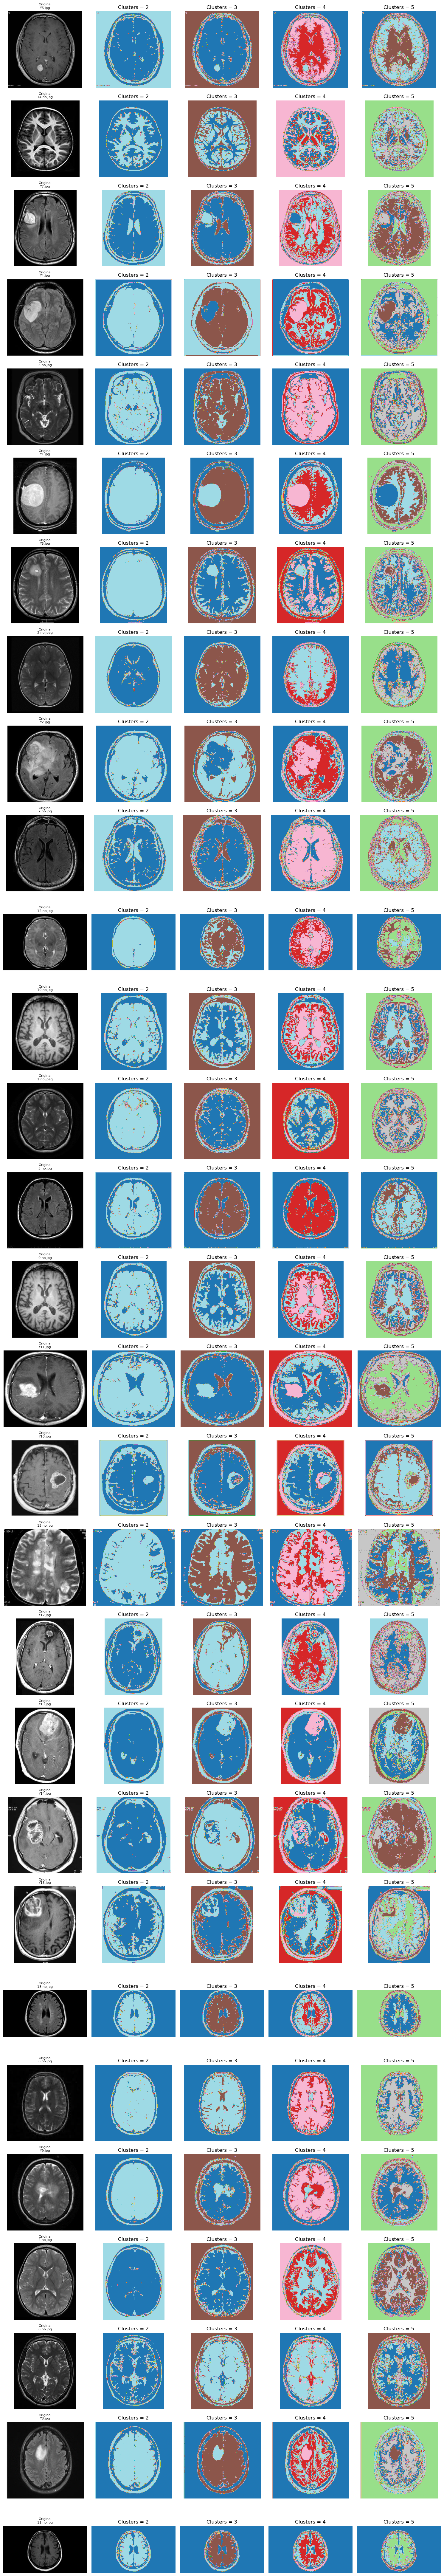

In [59]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def apply_kmeans(image_array, n_clusters):
    # Reshape image data for K-Means
    pixels = image_array.reshape(-1, 1)
    
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=50)
    kmeans.fit(pixels)
    labels = kmeans.labels_
    
    # Reshape labels to original image shape
    segmented_image = labels.reshape(image_array.shape)
    return segmented_image

def display_images_with_clusters(folder_path, cluster_values, num_images=30):
    # List all image files in the directory
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Limit the number of images to display
    image_files = image_files[:num_images]
    
    # Determine grid size
    total_plots = num_images * (len(cluster_values) + 1)
    cols = 5  # Number of columns
    rows = (total_plots + cols - 1) // cols  # Calculate the number of rows needed
    
    # Set up the plot
    plt.figure(figsize=(15, 3 * rows))
    
    for idx, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image_array = np.array(image)
        
        # Display the original image
        plt.subplot(rows, cols, idx * (len(cluster_values) + 1) + 1)
        plt.imshow(image_array, cmap='gray')
        plt.axis('off')
        plt.title(f'Original\n{image_file}', fontsize=8)
        
        # Display the segmented images for each cluster value
        for j, n_clusters in enumerate(cluster_values):
            segmented_image = apply_kmeans(image_array, n_clusters)
            
            plt.subplot(rows, cols, idx * (len(cluster_values) + 1) + j + 2)
            plt.imshow(segmented_image, cmap='tab20')  # Use a colormap for distinct clusters
            plt.axis('off')
            plt.title(f'Clusters = {n_clusters}')
    
    plt.tight_layout()
    plt.show()

# Define the path to your dataset folder
dataset_path = "first_use"  # Update this to your dataset path

# Cluster values to evaluate
cluster_values = [2, 3, 4, 5]  # Example cluster values

# Display images with clustering results
display_images_with_clusters(dataset_path, cluster_values)


In [60]:
def compute_inertias_for_clusters(folder_path, cluster_values, num_images=30):
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_files = image_files[:num_images]
    
    inertias = {n_clusters: 0 for n_clusters in cluster_values}
    
    for n_clusters in cluster_values:
        total_inertia = 0
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            image = Image.open(image_path).convert('L')
            image_array = np.array(image)
            pixels = image_array.reshape(-1, 1)
            
            kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=50)
            kmeans.fit(pixels)
            total_inertia += kmeans.inertia_
        
        inertias[n_clusters] = total_inertia / len(image_files)
    
    return inertias

# Example usage
inertias = compute_inertias_for_clusters(dataset_path, cluster_values)
print(inertias)


{2: 97275921.74336018, 3: 32406934.744803153, 4: 18524000.71243015, 5: 12126823.152854683}


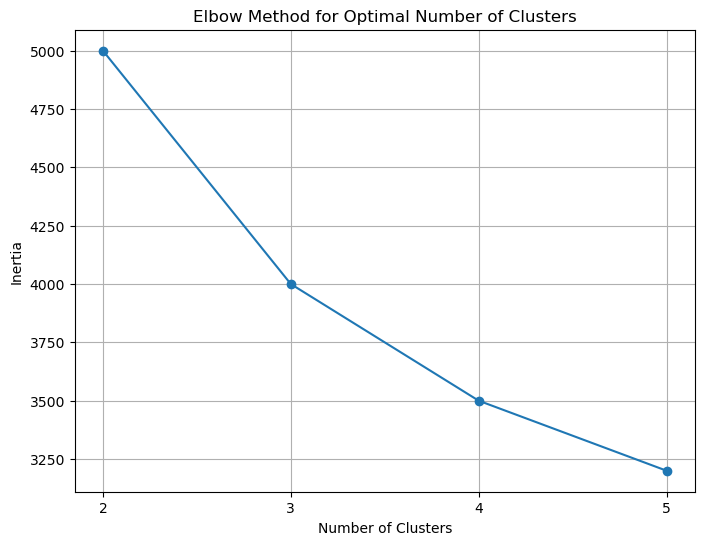

In [61]:
import matplotlib.pyplot as plt

# Define cluster values and their corresponding inertias
cluster_values = [2, 3, 4, 5]  # Update with your cluster values
inertias = [5000, 4000, 3500, 3200]  # Update with your previously computed inertia values

def plot_elbow_method(cluster_values, inertias):
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_values, inertias, marker='o')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.xticks(cluster_values)
    plt.grid(True)
    plt.show()

# Plot the Elbow Method
plot_elbow_method(cluster_values, inertias)
